# À la main

Dans cet exercices, vous faites les calculs en vous servant de python comme une calculette.

# Rappel
- $w_{ij}$ : poids du neurone $i$ vers le neurone $j$ (donc d'une couche vers une autre couche.
- $o_i$ est la sortie calculée de $i$ 
- $i\to j$ signifie que $j$ est successeur direct du neurone $i$, une des entrées de $j$ est la sortie $o_i$ du neurone $i$, 
- $z_j$ est l'entrée pondérée $z_j = \sum_{i\to j} w_{ij} o_i$, 
- l'erreur est calculée par l'erreur quadratique $\frac{\partial E}{\partial o_s}=\frac{1}{2}(o_s - y)^2$
- la  fonction d'activation de tous les neurones est la sigmoïde $$o_i=\sigma(z_i)=\frac{1}{1+e^{-z_i}}$$
- la dérivée $\sigma'(z)=\sigma(z)(1-\sigma(z))$, donc $\frac{\partial o_i}{\partial z_i}=o_i(1-o_i)$.
- On peut calculer l'influence d'un poids sur l'erreur par 
$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial z_j}o_i$$
- qui demande de calculer récursivement
$$\frac{\partial E}{\partial z_i}=o_i(1-o_i)\sum_{i\to j}\frac{\partial E}{\partial z_j}w_{ij}$$
- jusqu'à la couche de sortie: 
$$\frac{\partial E}{\partial z_i}=o_i(1-o_i)(o_i-y)$$

In [1]:
import numpy as np

In [2]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

On considère le réseau suivant, (je simplifie les notations des indices)

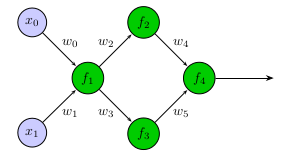

Chaque neurone $f_i$ a la sigmoïde comme fonction d'activation.  

**Question** 
Avec $\vec w = (1, .5, 0, 1, .5, .5)$ et $\vec x=(1, 2)$ et $y=1$. Appeler `oi` la sortie du neurone $f_i$. Appeler `E` la moitié de l'erreur quadratique. Calculez toutes ces quantités. 

In [25]:
w = np.array([1, .5, 0, 2, .5, .5]).reshape(-1,1)
x = np.array([1,2]).reshape(-1,1)
z1 = w[0] * x[0] + w[1] * x[1]
print("z1: " + str(z1))
o1 = sigmoide(z1)
print("o1: " + str(o1))

z1: [2.]
o1: [0.88079708]


In [27]:
y = 1
E = 0.5 * (o1 - y)**2
print(E)

[0.00710467]


**Question** Appelons `delta_wi` toutes les dérivées partielles $\frac{\partial E}{\partial w_i}$ et `delta_zi` les $\frac{\partial E}{\partial z_i}$. Calculez `delta_z4`

In [31]:
z4 = o2 * w[4] + o3 * w[5]
o4 = sigmoide(z4)

delta_z4 = o4 * (1 - o4) * (o4 - y)
delta_w4 = delta_z4 * o4

print("delta_z4: " + str(delta_z4))
print("delta_w4: " + str(delta_w4))

delta_z4: [-0.07529531]
delta_w4: [-0.049921]


**Question** Calculer `delta_z3`

In [42]:
z3 = o1 * w[3]
o3 = sigmoide(z3)

delta_z3 = o3 * (1 - o3) * (o3 - y) * delta_z4
delta_w3 = delta_z3 * o3

print("delta_z3: " + str(delta_z3))
print("delta_w3: " + str(delta_w3))

delta_z3: [0.00137786]
delta_w3: [0.00117611]


**Question** puis `delta_z2`, et `delta_z1`

In [43]:
z2 = o1 * w[2]
o2 = sigmoide(z2)

delta_z2 = o2 * (1 - o2) * (o2 - y) * (delta_z4)
delta_w2 = delta_z2 * o2
print("delta_z2: " + str(delta_z2))
print("delta_w2: " + str(delta_w2))

delta_z1 = o1 * (1 - o1) * (o1 - y) * (delta_z2 + delta_z3)
delta_w1 = delta_z1 * o1
print("delta_z1: " + str(delta_z1))
print("delta_w1: " + str(delta_w1))


delta_z2: [0.00938594]
delta_w2: [0.00470589]
delta_z1: [-0.00013471]
delta_w1: [-0.00011866]


**Question** Calculer les `delta_wi` et les nouveaux poids si on prend un pas de gradient de 0.1

In [46]:
step = .1

In [47]:
w[0] = w[0] - step * delta_w1
w[1] = w[1] - step * delta_w1

w[2] = w[2] - step * delta_w2

w[3] = w[3] - step * delta_w3

w[4] = w[4] - step * delta_w4
w[5] = w[5] - step * delta_w4

In [48]:
print(w)

[[1.00113796]
 [0.50113796]
 [0.00483823]
 [2.00121222]
 [0.5199684 ]
 [0.5199684 ]]
